# Analysis of NTK Correction Term Scaling Laws with respect to L

We analyze how the spectral radius of the NTK correction term scales with respect to network depth (L)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress

In [ ]:
PATH_TO_DATA = "/home/janis/STG3A/deeperorwider/experiments/data/large_ntk_corrections"
files = os.listdir(PATH_TO_DATA)
data = []

for f in files:
    if f.startswith("ntk_correction_"):
        d = np.load(os.path.join(PATH_TO_DATA, f), allow_pickle=True).item()
        data.append(d)

## Scaling Analysis by Configuration

In [ ]:
def plot_config_scaling(data):
    # Create figure with 3 vertically stacked subplots for L, D_IN and N scaling
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 18))
    
    # Plot L scaling
    L_groups = {}
    L_slopes = []
    for d in data:
        key = (d['N'], d['D_IN'], d['M'])
        if key not in L_groups:
            L_groups[key] = []
        L_groups[key].append((d['L'], d['mean_spectral_radius']))
    
    # Calculate and store L slopes
    for config, values in L_groups.items():
        if len(values) > 4:
            x = np.array([v[0] for v in sorted(values)])
            y = np.array([v[1] for v in sorted(values)])
            slope, _, r_value, _, _ = linregress(np.log(x), np.log(y))
            L_slopes.append((config, slope, r_value**2, len(x)))
    
    # Plot D_IN scaling
    D_groups = {}
    for d in data:
        key = (d['N'], d['L'], d['M'])
        if key not in D_groups:
            D_groups[key] = []
        D_groups[key].append((d['D_IN'], d['mean_spectral_radius']))
        
    # Plot N scaling
    N_groups = {}
    N_slopes = []
    for d in data:
        key = (d['L'], d['D_IN'], d['M'])
        if key not in N_groups:
            N_groups[key] = []
        N_groups[key].append((d['N'], d['mean_spectral_radius']))

    # Calculate and store N slopes
    for config, values in N_groups.items():
        if len(values) > 4:
            x = np.array([v[0] for v in sorted(values)])
            y = np.array([v[1] for v in sorted(values)])
            slope, _, r_value, _, _ = linregress(np.log(x), np.log(y))
            N_slopes.append((config, slope, r_value**2, len(x)))

    # Plot L scaling
    for config, values in L_groups.items():
        if len(values) > 4:
            x = [v[0] for v in sorted(values)]
            y = [v[1] for v in sorted(values)]
            ax1.loglog(x, y, 'o', alpha=0.3, markersize=4)
            
    ax1.set_title('Spectral Radius vs L (all configs)')
    ax1.set_xlabel('L')
    ax1.set_ylabel('Spectral Radius')
    ax1.grid(True)

    # Plot D_IN scaling
    for config, values in D_groups.items():
        if len(values) > 4:
            x = [v[0] for v in sorted(values)]
            y = [v[1] for v in sorted(values)]
            ax2.loglog(x, y, 'o', alpha=0.3, markersize=4)
            
    ax2.set_title('Spectral Radius vs D_IN (all configs)')
    ax2.set_xlabel('D_IN')
    ax2.set_ylabel('Spectral Radius')
    ax2.grid(True)

    # Plot N scaling
    for config, values in N_groups.items():
        if len(values) > 4:
            x = [v[0] for v in sorted(values)]
            y = [v[1] for v in sorted(values)]
            ax3.loglog(x, y, 'o', alpha=0.3, markersize=4)
            
    ax3.set_title('Spectral Radius vs N (all configs)')
    ax3.set_xlabel('N')
    ax3.set_ylabel('Spectral Radius')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

    # Print slope tables
    print("\nL Scaling Slopes:")
    print("Config (N, D_IN, M) | Slope | R^2 | Points")
    print("-" * 50)
    for config, slope, r2, points in sorted(L_slopes, key=lambda x: abs(x[1]), reverse=True):
        print(f"N={config[0]}, D={config[1]}, M={config[2]} | {slope:.3f} | {r2:.3f} | {points}")

    print("\nN Scaling Slopes:")
    print("Config (L, D_IN, M) | Slope | R^2 | Points")
    print("-" * 50)
    for config, slope, r2, points in sorted(N_slopes, key=lambda x: abs(x[1]), reverse=True):
        print(f"L={config[0]}, D={config[1]}, M={config[2]} | {slope:.3f} | {r2:.3f} | {points}")

Analyzing scaling laws...


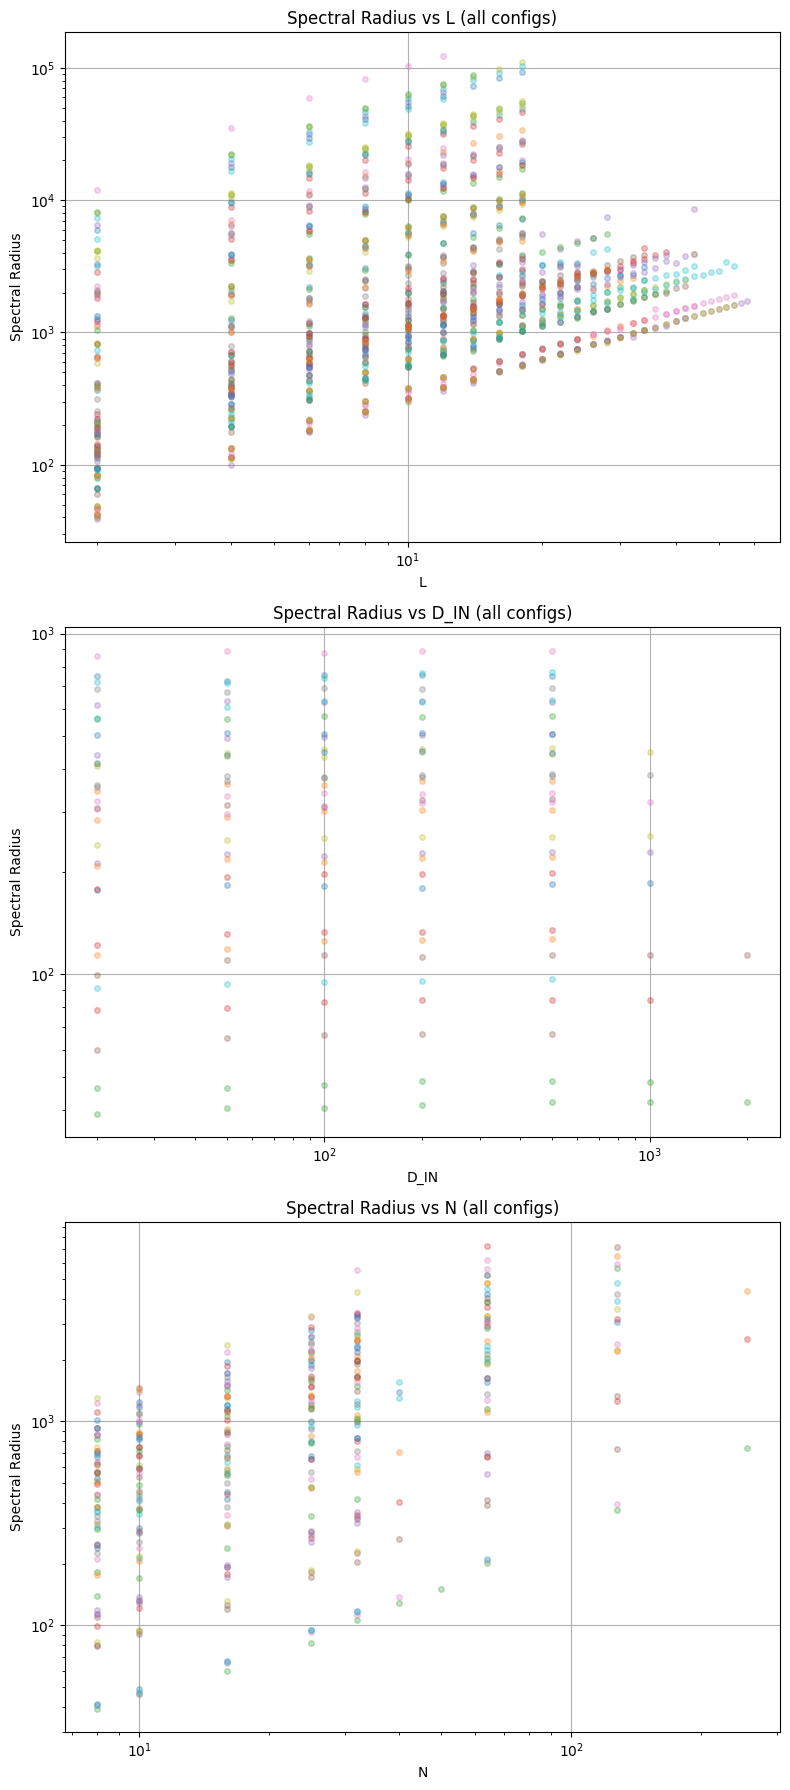


L Scaling Slopes:
Config (N, D_IN, M) | Slope | R^2 | Points
--------------------------------------------------
N=40, D=20, M=10 | 1.435 | 0.970 | 6
N=64, D=20, M=100 | 1.355 | 0.984 | 6
N=32, D=20, M=500 | 1.348 | 0.988 | 6
N=25, D=20, M=30 | 1.338 | 0.992 | 6
N=32, D=50, M=200 | 1.330 | 0.990 | 6
N=32, D=100, M=100 | 1.330 | 0.990 | 6
N=25, D=50, M=20 | 1.324 | 0.991 | 6
N=25, D=100, M=10 | 1.315 | 0.990 | 6
N=128, D=20, M=10 | 1.315 | 0.985 | 9
N=16, D=20, M=2000 | 1.298 | 0.992 | 6
N=16, D=200, M=200 | 1.294 | 0.991 | 6
N=16, D=100, M=500 | 1.292 | 0.992 | 6
N=64, D=20, M=20 | 1.284 | 0.988 | 9
N=16, D=50, M=1000 | 1.284 | 0.992 | 6
N=64, D=50, M=10 | 1.268 | 0.986 | 9
N=32, D=20, M=20 | 1.254 | 0.981 | 14
N=10, D=500, M=10 | 1.250 | 0.994 | 6
N=32, D=20, M=200 | 1.248 | 0.983 | 9
N=10, D=200, M=20 | 1.248 | 0.992 | 6
N=8, D=20, M=60 | 1.245 | 0.993 | 7
N=16, D=20, M=100 | 1.240 | 0.991 | 9
N=32, D=50, M=20 | 1.239 | 0.988 | 9
N=32, D=100, M=10 | 1.239 | 0.988 | 9
N=32, D=50, M=10

In [ ]:
# Plot scaling with respect to L, D_IN and N
print("Analyzing scaling laws...")
plot_config_scaling(data)